# Data Preprocessing (Data Cleansing) 
Langkah yang akan dilakukan adalah,

Mencari ID pelanggan (Nomor telepon) yang valid
Mengatasi data-data yang masih kosong (Missing Values)
Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
Menstandardisasi Nilai dari Variable

# Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data.

1. Pandas
Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

read_csv() digunakan untuk membaca file csv
str.match() digunakan untuk mencocokan dengan karakter tertentu
drop() digunakan untuk menghapus
count() digunakan untuk menghitung masing-masing variable
drop_duplicates() digunakan untuk menghapus data duplicate rows
fillna() digunakan untuk mengisi dengan nilai tertentu
quantile() digunakan untuk melihat quantile ke tertentu
mask() mengganti nilai tertentu jika kondisi memenuhi
astype() mengubah tipe data
value_counts() digunakan untuk menghitung unik dari kolom
sort_values() digunakan untuk sort values
isnull() digunakan untuk mendeteksi missing values
dropna() digunakan untuk menghapus missing values
replace() digunakan untuk mengganti nilai

2. Matplotlib
Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

figure() digunakan untuk membuat figure gambar baru

3. Seaborn
Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

box_plot() digunakan untuk membuat box plot

# Data yang Digunakan
Untuk dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

 
Untuk detail datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No) 

# Import Library dan Dataset
Berdasarkan penjelasan mengenai library dan dataset yang akan digunakan, sekarang hal pertama yang akan kita lakukan adalah melakukan import library dan dataset ke dalam workspace kita.

Setelah dataset di-import ke dalam workspace, tampilkan jumlah kolom dan baris dari data set dengan menggunakan .shape dan print 5 baris teratas dengan menggunakan head() dan carilah ada berapa nilai customerID yang bersifat unique dengan menggunakan .unique

Notes:

1. pd.options.display.max_columns = 50 digunakan untuk mempermudah penampilan row data

2. Simpan dataset ke dalam variabel df_load

In [1]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)
#Tampilkan 5 data teratas
print(df_load.head(5))
#Jumlah ID yang unik
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

# Memfilter ID Number Pelanggan Format Tertentu
Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

Panjang karakter adalah 11-12.
Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
Diawali dengan angka 45 2 digit pertama.
 
Gunakan fungsi count() untuk menghitung banyaknya rows Customer ID, anda juga bisa menggunakan str.match() & regex untuk mencocokan dengan kriteria diatas. Jangan lupa gunakan astype() untuk merubah tipe datanya yang semula numeric

Notes : Buat kolom bantuan baru dengan nama `valid_id`

In [2]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# Duplikasi ID Number Pelanggan
Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

- Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
- Duplikasi dikarenakan inserting beda periode pengambilan data
Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk diolah di tahap ini. Gunakan fungsi drop_duplicates() untuk menghapus duplikasi rows, dan gunakan sort_values() untuk mengecek pengambilan data terakhir

In [3]:

import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 7017


# Mengatasi Missing Values dengan Penghapusan Rows
Selanjutnya kita akan menghapus rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Diasumsikan data modeller hanya mau menerima data yang benar ada flag churn-nya atau tidak.

Gunakan isnull() digunakan untuk mendeteksi missing values dan dropna() untuk menghapus data yang missing values.

In [4]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (7070, 22)


# Missing Values dengan Pengisian Nilai tertentu
Selain dengan menghapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:
- Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk lama berlangganan di isi dengan 11.
- Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut.

Tentukan:
1. Apakah masih ada data yang missing values
2. Jumlah missing values dari masing-masing variable
3. Tangani missing values-nya

In [5]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
median = df_load[col_name].median()
df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

IndentationError: expected an indented block (Temp/ipykernel_11204/3660003676.py, line 13)

# Mendeteksi adanya Outlier (Boxplot)
Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

Gunakan package  matplotlib & seaborn untuk memvisualisasikan data-data yang mau dilihat boxplot-nya. Fungsi describe() gunakan saat untuk melihat deskripsi datanya.


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7014.000000     7087.000000   7098.000000
mean     32.749358       67.018985   2306.582650
std      25.206376      117.396646   2575.212013
min       0.000000        0.000000     19.000000
25%       9.000000       36.100000    402.925000
50%      30.000000       70.450000   1400.700000
75%      56.000000       89.900000   3801.600000
max     500.000000     9000.000000  80000.000000


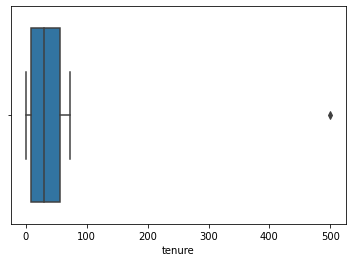

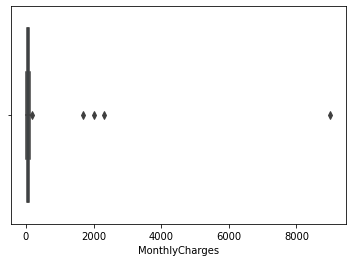

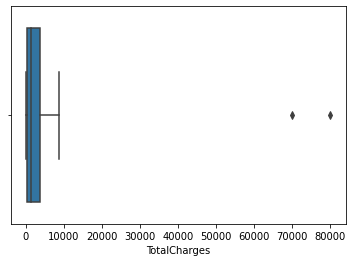

In [6]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Your Codes here
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Mengatasi Outlier
Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR). Untuk detail jelasnya, bisa dilihat di ilustrasi di bawah ini:

Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk di olah di tahap ini. Gunakan fungsi quantile() untuk melihat quantile tertentu, dan gunakan mask() untuk me-replace nilai. Tentukan:
- Nilai minimum dan maximum data di tolerir
- Ubah nilai yang di luar range minimum & maximum ke dalam nilai minimum dan maximum

In [7]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Your code goes here
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             126.5000
MonthlyCharges     170.6000
TotalCharges      8899.6125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -61.5000
MonthlyCharges     -44.6000
TotalCharges     -4695.0875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7014.000000     7087.000000   7098.000000
mean     32.696108       64.995837   2287.957576
std      24.606516       30.133477   2268.788381
min       0.000000        0.000000     19.000000
25%       9.000000       36.100000    402.925000
50%      30.000000       70.450000   1400.700000
75%      56.000000       89.900000   3801.600000
max     126.500000      170.600000   8899.612500


C:\Users\User\AppData\Local\Temp/ipykernel_11204/3055423745.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\User\AppData\Local\Temp/ipykernel_11204/3055423745.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


# Mendeteksi Nilai yang tidak Standar
Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

Gunakan fungsi value_counts() untuk melihat jumlah data unique per variable-nya. 

In [11]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
print('\nUnique Values Count\033[1m' + 'Before Standardized\033[0m Variable',[col_name])
print(df_load[col_name].value_counts())


IndentationError: expected an indented block (Temp/ipykernel_11204/3642316517.py, line 6)

# Menstandarisasi Variable Kategorik
Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah. Gunakan fungsi replace() untuk menstandardkan nilai.

In [ ]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
	print(df_load[col_name].value_counts())